In [1]:
import sympy as syp

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
import matplotlib.ticker as mticker

In [3]:
x, y, z, alpha, beta, theta, phi, lam, epsilon = syp.symbols('x y z alpha beta theta phi lambda epsilon')

In [4]:
dxdt = z*(2*(1-x) - lam*y*(y+1)) - alpha*x*y**2 - theta*x
dydt = alpha/lam * x*y**2 - beta*y**2 + theta/lam * x - phi*y
dzdt = 1/epsilon * (1 - z*(2*(1-x) - lam*y*(y+1)))

In [5]:
dxdt

-alpha*x*y**2 - theta*x + z*(-lambda*y*(y + 1) - 2*x + 2)

In [6]:
J = syp.Matrix([dxdt, dydt, dzdt]).jacobian([x, y, z])

In [7]:
eigenvalues = J.eigenvals()

In [8]:
sol = syp.solve([dxdt, dydt, dzdt], [x, y, z])

In [9]:
x0, y0, z0 = sol[1]

In [10]:
J

Matrix([
[       -alpha*y**2 - theta - 2*z, -2*alpha*x*y + z*(-lambda*y - lambda*(y + 1)),          -lambda*y*(y + 1) - 2*x + 2],
[alpha*y**2/lambda + theta/lambda,           2*alpha*x*y/lambda - 2*beta*y - phi,                                    0],
[                     2*z/epsilon,       -z*(-lambda*y - lambda*(y + 1))/epsilon, (lambda*y*(y + 1) + 2*x - 2)/epsilon]])

In [11]:
x0

lambda*(2*alpha*beta + alpha*lambda*phi**2 + alpha*phi*sqrt(lambda*(4*beta + lambda*phi**2)) + 2*beta**2*lambda*theta)/(2*(alpha**2 + 2*alpha*beta*lambda*theta + alpha*lambda**2*phi**2*theta + beta**2*lambda**2*theta**2))

In [12]:
y0

(-lambda*phi + sqrt(lambda*(4*beta + lambda*phi**2)))/(2*beta*lambda)

In [13]:
z0

sqrt(lambda*(4*beta + lambda*phi**2))*(alpha**2*beta - alpha**2*phi + 2*alpha*beta**2*lambda*phi + 2*alpha*beta**2*lambda*theta + alpha*beta*lambda**2*phi**2*theta - 2*alpha*beta*lambda*phi*theta - alpha*lambda**2*phi**3*theta + beta**3*lambda**2*theta**2 - beta**2*lambda**2*phi*theta**2)/(2*(4*alpha**2*beta**2 + 2*alpha**2*beta*lambda*phi - alpha**2*beta*lambda - 4*alpha**2*beta - 2*alpha**2*lambda*phi**2 + alpha**2*lambda*phi + alpha**2 + 8*alpha*beta**3*lambda*theta - 8*alpha*beta**3*lambda + 4*alpha*beta**2*lambda**2*phi**2*theta - 4*alpha*beta**2*lambda**2*phi**2 + 4*alpha*beta**2*lambda**2*phi*theta - 6*alpha*beta**2*lambda**2*phi - 2*alpha*beta**2*lambda**2*theta - 8*alpha*beta**2*lambda*theta + 4*alpha*beta**2*lambda + 2*alpha*beta*lambda**3*phi**3*theta - 2*alpha*beta*lambda**3*phi**3 - alpha*beta*lambda**3*phi**2*theta - 8*alpha*beta*lambda**2*phi**2*theta + 8*alpha*beta*lambda**2*phi**2 + 2*alpha*beta*lambda**2*phi*theta + 2*alpha*beta*lambda*theta - 2*alpha*lambda**3*phi**4

In [19]:
J0 = J.subs({x: x0, y: y0, z: z0})

In [15]:
r = syp.symbols('r')
M = J0.subs({alpha: 50/r, beta: 50/r, theta: 1/r, phi: 35/r, lam: 0.1, epsilon: 1000})

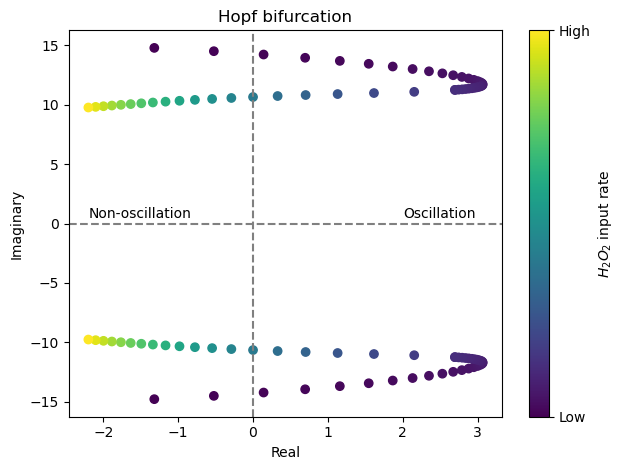

In [16]:
fig, ax = plt.subplots()
real_list = []
img_list = []
r_list = []
ran = np.append(np.linspace(0.8, 2, 30), np.linspace(2, 10, 20))
for rn in ran:
    ev = M.subs({r: rn}).eigenvals()
    ev_list = list(ev.keys())
    img_ev = [e for e in ev_list if e.is_real==False]
    real_list += [e.as_real_imag()[0] for e in img_ev]
    img_list += [e.as_real_imag()[1] for e in img_ev]
    r_list += [rn, rn]
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')
fig.colorbar(ax.scatter(real_list, img_list, c=r_list), label='$H_2O_2$ input rate', ticks=[0.8, 10], format=mticker.FixedFormatter(['Low', 'High']))
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.text(2, 0.5, 'Oscillation')
ax.text(-2.2, 0.5, 'Non-oscillation')
ax.set_title('Hopf bifurcation')
plt.tight_layout()

In [17]:
full_FTC_first_order['info']

'4 params: alpha, beta, theta, phi. 2 consts: lam, m, 3 vars: cA2, cS, cO'

(<Figure size 700x500 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

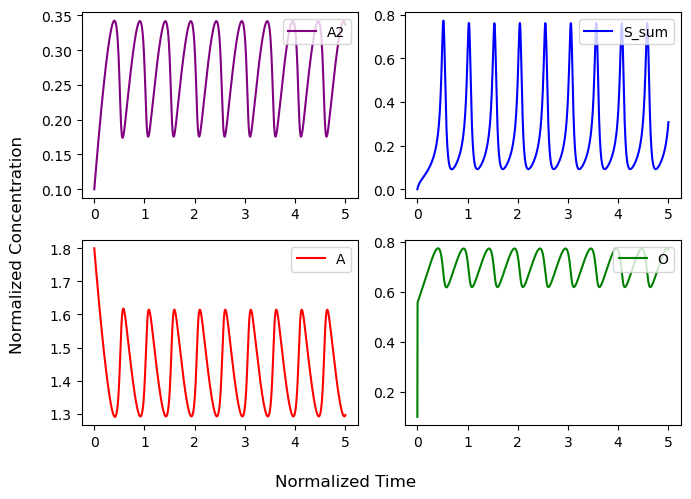

In [18]:
params = np.array([50.0, 50.0, 1.0, 35.0])/1
const = np.array([0.1, 2])
init_cond = np.array([0.1, 0, 0.1])
model = oscillation(full_FTC_first_order['model'], params, const, init_cond, full_FTC_first_order['calc_all'])
model.plot(t=5,method='LSODA', npoints=1000)

In [20]:
sol = model.simulate(t=20, method='LSODA', npoints=1000)

In [ ]:
T = 298
R = 8.314
cA2, cS, cO = sol.y
lam, m = const
alpha, beta, theta, phi = params
cA = 2 * (1 - cA2) - lam * (cS + cS**m)

muA2 = R * T * np.log(cA2)
muS = R * T * np.log(cS)
muO = R * T * np.log(cO)

